#  Лабораторная работа №2 «ДВПФ и ДПФ»
Курс: «Радиофизическая лаборатория» ФРКТ МФТИ


In [2]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy as sp
from scipy import signal
from scipy.linalg import dft

In [3]:
# Если используете Jupyter, то можно поменять backend matplotlib на notebook
# %matplotlib notebook
# Для использования backend matplotlib widget, раскомментируйте строку ниже.
# %matplotlib widget
# Для использования backend matplotlib inline, раскомментируйте строку ниже.
# %matplotlib inline


# Занятие 1. Основные свойства ДВПФ
Далее значения $N$, $L$, ${{\nu }_{0}}$ следует использовать из таблицы в соответствии с Вашим вариантом задания.

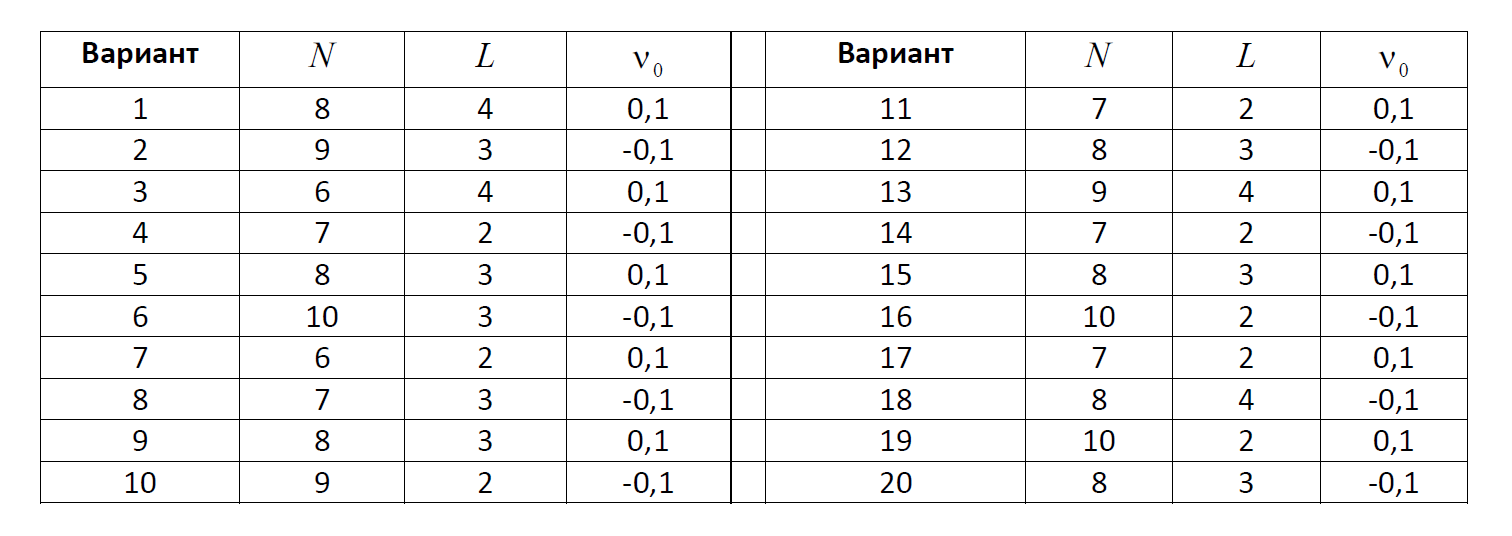

### Вариант в журнале: 12

In [4]:
N = 8
L = 3
nu_0 = -0.1

## Задача 1.1.  Прямоугольный импульс в дискретной форме.  

С помощью моделирования  вычислите и постройте график для модуля и фазы ДВПФ  $X_N(\nu)$  последовательности из $N$ последовательных единичных импульсов ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ для $\nu \in [-0,5; \;0,5]$.  Сравните результат с аналитической записью для  $X_N(\nu)$ (задача 1.б из задания к допуску).  Заполнить таблицу, используя результаты моделирования и аналитические записи. Принять частоту дискретизации равной 1 Гц. 

| | Значение <br> X(0)     | Ширина $\Delta\nu$ главного лепестка <br> на нулевом уровне | Точки скачков фазы <br> на $\pi$   | Энергия$^2$ $\times\Delta t$ <br> $\int_{-1/2}^{1/2} \|X(\nu)\|^{2} d\nu$   |
|----|------------------------|----------------|----------------|----------------|
| Модель      |8                       | 0.25           | [-0.5, -0.375, -0.25, -0.125, 0.125, 0.25, 0.375] | 8               |
| Аналитика   |8                       | 0.25           | [-0.5, -0.375, -0.25, -0.125, 0.125, 0.25, 0.375] | 8               |

$^2$ Для дискретного сигнала рассматривают энергию $\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $, приходящуюся на один период частоты, т.е. на полосу частот шириной ${{f}_{\text{д}}}$:

$\int_{-0,5{{f}_{\text{д}}}}^{0,5{{f}_{\text{д}}}}{|}X(f){{|}^{2}}df=\frac{1}{\Delta t}\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $
Для ее вычисления можно воспользоваться равенством Парсеваля для ДВПФ. 


In [5]:
def dtft(x, M=2048):
    return np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

* `nu` — массив частот $\nu \in [-0.5;0.5)$ с шагом сетки $\Delta \nu =1/M$,
* `X` — значения ДВПФ $X(\nu )$ в этих точках, 
* `dtft` — функция вычисления ДВПФ, 
* `x` — последовательность отсчетов, 
* `M` — число точек на сетки оси частот, в которых вычисляется ДВПФ. 

Определим ДВПФ последовательности $x[k]$ 

In [6]:
def drawSpectrum(x, nu, X, label, color):
    plt.subplot(3, 1, 1)
    plt.plot(nu, abs(X), label=label, c=color)

    plt.xlim([-0.5, 0.5])
    plt.ylim(bottom=0)
    plt.title('ДВПФ $x[k]$ (модуль), один период')
    plt.xlabel('$\\nu$')
    plt.ylabel('$|X(\\nu)|$')
    plt.xticks(np.linspace(-0.5, 0.5, 11))
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(nu, np.angle(X), label=label, c=color)

    plt.xlim([-0.5, 0.5])
    plt.ylim([-np.pi, np.pi])
    plt.title('ДВПФ $x[k]$ (фаза), один период')
    plt.xlabel('$\\nu$')
    plt.ylabel('$\\varphi(\\nu)$, рад')
    plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
    plt.xticks(np.linspace(-0.5, 0.5, 11))
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.stem(np.real(x), label=label, markerfmt=color)
    plt.title('Сигнал $x[k]$')
    plt.xlabel('$k$')
    plt.ylabel('$x[k]$')
    plt.xticks(ticks=np.arange(x.size)[::max(int(np.ceil(N/10)), 1)])
    plt.tight_layout()
    plt.grid(True)
    plt.legend()


In [7]:
def evalEnergy(x_k):
    return np.add.accumulate(x_k * np.conjugate(x_k))[-1]

In [8]:
# x = np.array([1, 5, 2, 4, 1, 1, 3])
x = x * range(7)

nu, X = dtft(x)
np.trapz(np.abs(X)**2, nu) / 4 / np.pi**2

NameError: name 'x' is not defined

/tmp/ipykernel_4311/4001717785.py:13: RuntimeWarning: invalid value encountered in divide
  getAnalyticX_N = lambda nu: np.sin(N*np.pi*nu) / np.sin(np.pi*nu) * np.exp(-1j*(N-1)*np.pi*nu)



Энергия: 8.0
Нули спектра: [-0.5   -0.375 -0.25  -0.125  0.125  0.25   0.375]


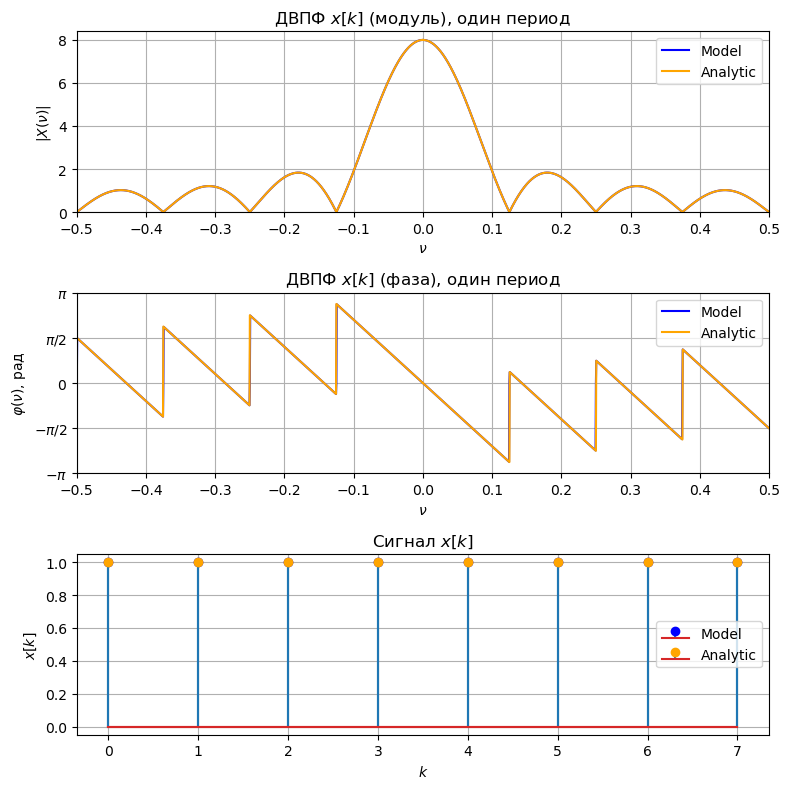

In [9]:
M = 2048
# M = 7
plt.figure(figsize=[8, 8])

# Последовательность из N единичных импульсов.
x = np.ones(N)
# x = np.array([1, 5, 2, 4, 1, 1, 3])
# x = x * range(7)

# Модель.
nu, X = dtft(x, M=M)
# Аналитическое выражение.
getAnalyticX_N = lambda nu: np.sin(N*np.pi*nu) / np.sin(np.pi*nu) * np.exp(-1j*(N-1)*np.pi*nu)
X_a = getAnalyticX_N(nu)

print(f"\nЭнергия: {evalEnergy(x)}")
roots = np.where(X == 0)
print(f"Нули спектра: {nu[roots]}")

drawSpectrum(x, nu, X, "Model", color='blue')
drawSpectrum(x, nu, X_a, "Analytic", color='orange')

assert max(abs(X_a-X)) < 1e-6

## Задача 1.2.  Свойство масштабирования. 

Постройте последовательность ${{x}_{L}}[k]=\sum\limits_{m=-\infty }^{\infty }{{{x}_{N}}}[m]\mathbf{1}[k-mL]$, добавив $L-1$ нулевой отсчет между каждой парой соседних отсчетов сигнала ${{x}_{N}}[k]$ (из задачи 1.1). С помощью моделирования постройте модуль ее ДВПФ для $\nu \in [-0,5; \;0,5]$ и сравните результат с ${{X}_{N}}(\nu L)$ (из задачи 1.1).


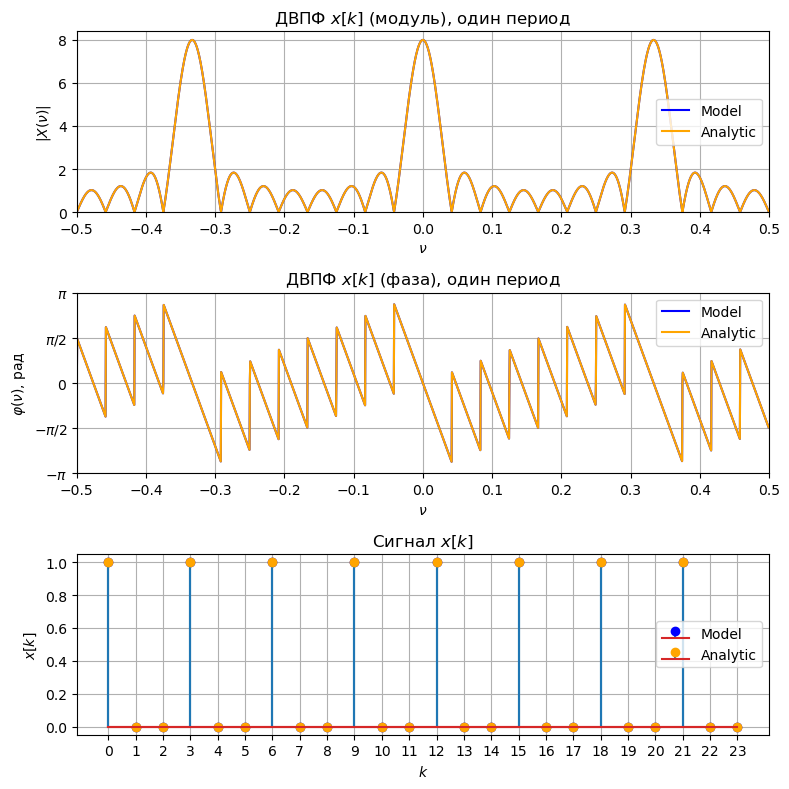

In [10]:
plt.figure(figsize=[8, 8])

# Рассчет x_L "в лоб".
x_L = np.zeros(N*L)
for i in range(N):
    x_L[i*L] = x[i]

nu_L, X_L = dtft(x_L, M=M)
drawSpectrum(x_L, nu_L, X_L, "Model", color='blue')

# Сравнение с X(nu*L).
needs_roll = (L+1)%2
tmp = np.roll(np.tile(X, L), (len(X)//2) * needs_roll)
X_nuL = tmp[::L]
drawSpectrum(x_L, nu_L, X_nuL, "Analytic", color='orange')

assert max(abs(X_nuL-X_L)) < 1e-6

## Задача 1.3.  Дифференцирование спектральной плотности.
Рассмотрите последовательность ${{x}_{D}}[k]=k\,{{x}_{N}}[k]$.  Постройте с помощью моделирования график для модуля ДВПФ этой последовательности ${{X}_{D}}(\nu )$ для $\nu \in [-0,5; \;0,5]$. 

** Получить численным или символьным дифференцированием график для $\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu }$ и сравнить его с ${{X}_{D}}(\nu ).$ 


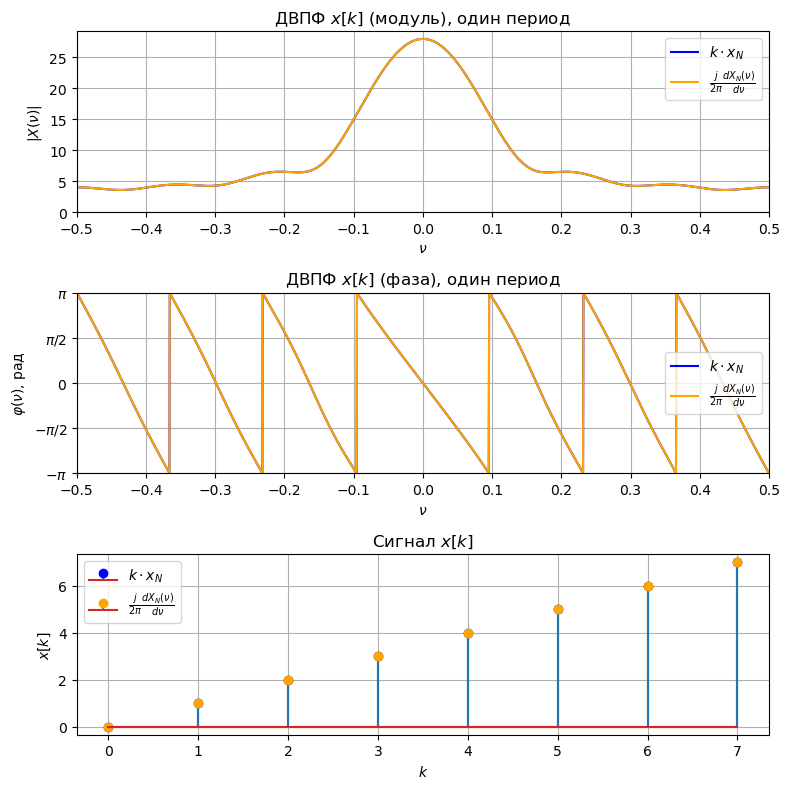

In [11]:
plt.figure(figsize=[8, 8])

# Рассчет "в лоб".
x_D = np.array(range(0, len(x))) * x

nu_D, X_D = dtft(x_D, M=M)
drawSpectrum(x_D, nu_D, X_D, "$k\cdot x_N$", color='blue')

# Производная.
derivative = 1j/(2*np.pi) * np.gradient(X, nu)
drawSpectrum(x_D, nu_D, derivative, r"$\frac{j}{2 \pi} \frac{dX_N(\nu)}{d\nu}$", color='orange')

# Из-за численного дифференцирования.
assert np.mean(abs(X_D-derivative)) < 1e-3

## Задача 1.4. Теорема смещения.
С помощью моделирования получите график модуля спектральной плотности ${{X}_{S}}(\nu )$ для сигнала ${{x}_{S}}[k]={{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k)$. Приведите ответы на следующие вопросы.

а) Какую аналитическую форму записи имеет функция ${{X}_{S}}(\nu )$?

${{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k) \leftrightarrow X(\nu - \nu_0) =
\frac{\sin(N\pi(\nu - \nu_0))}{\sin(\pi(\nu - \nu_0))} \exp(-j(N-1)\pi(\nu - \nu_0))$.

б) Как результат моделирования соотносится с теоремой смещения для ДВПФ? 

На графике видно, что спектр просто смещен влево на $| \nu_0 | = 0.1$.

в) Почему получившийся спектр не симметричен относительно нулевой частоты? 

Потому что он смещен.

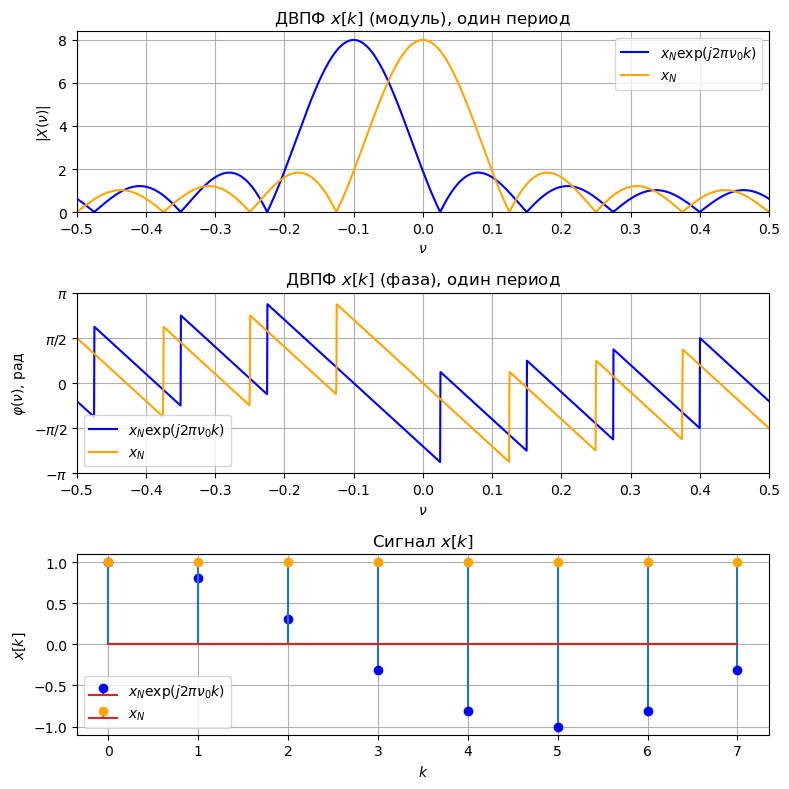

In [12]:
plt.figure(figsize=[8, 8])

# Рассчет "в лоб".
x_S = np.e**(1j*2*np.pi*nu_0*np.array(range(0, len(x)))) * x

nu_S, X_S = dtft(x_S, M=M)
drawSpectrum(x_S, nu_S, X_S, r"$x_N \exp(j 2 \pi \nu_0 k)$", color='blue')

# График для сравнения.
drawSpectrum(x, nu, X, r"$x_N$", color='orange')


## Задача 1.5. Теорема о свертке во временной области. 

Вычислите с помощью моделирования линейную дискретную свертку последовательности ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ с точно такой же последовательностью. Постройте график для модуля ДВПФ  этой последовательности. Воспользовавшись теоремой о свертке, получите аналитическую запись ДВПФ. Заполните таблицу.

| Значение <br> X(0) | Ширина $\Delta\nu$ главного лепестка <br> на нулевом уровне |  Энергия $\times\Delta t$ <br> $\int_{-1/2}^{1/2} \|X(\nu)\|^2 d\nu$  |
|-------------|-------|--------|
| 64          | 0.25  | 344    |


Нули АЧХ: [-0.5   -0.375 -0.25  -0.125  0.125  0.25   0.375]
Энергия: 344.0
Максимум: 64.0


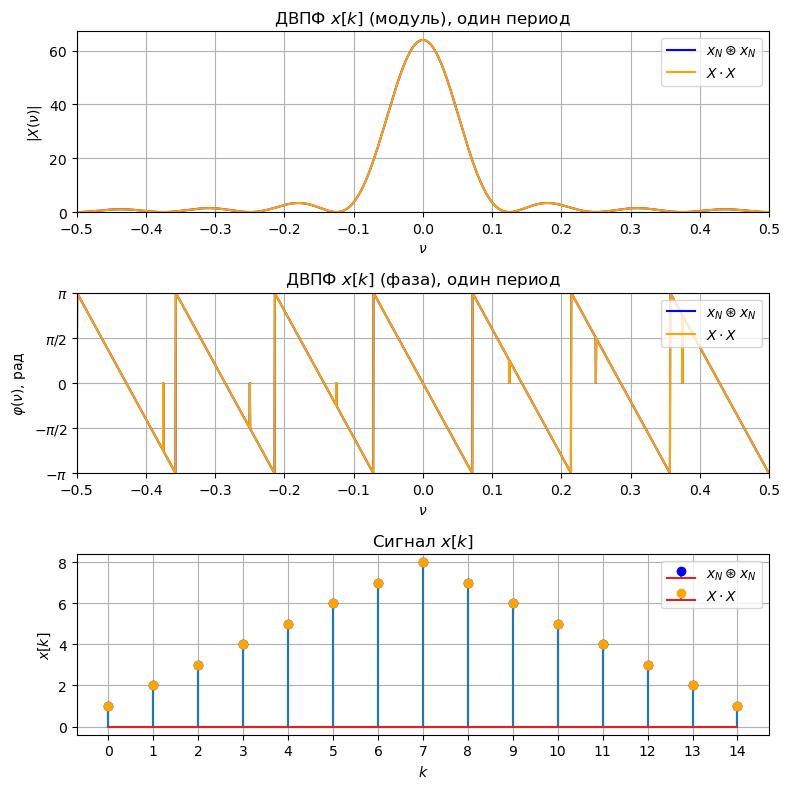

In [13]:
plt.figure(figsize=[8, 8])

# Свертка сигнала с самим собой.
x_C = np.convolve(x, x)

nu_C, X_C = dtft(x_C, M=M)

analytical = X * X

roots = nu_C[np.where(X_C == 0)[0]]
print(f"Нули АЧХ: {roots}")

print(f"Энергия: {evalEnergy(x_C)}")
print(f"Максимум: {max(abs(X_C))}")

drawSpectrum(x_C, nu_C, X_C, r"$x_N \circledast x_N$", color='blue')
drawSpectrum(x_C, nu_C, analytical, r"$X \cdot X$", color='orange')

assert max(abs(X_C-analytical)) < 1e-6

# Занятие 2. Основные свойства ДПФ

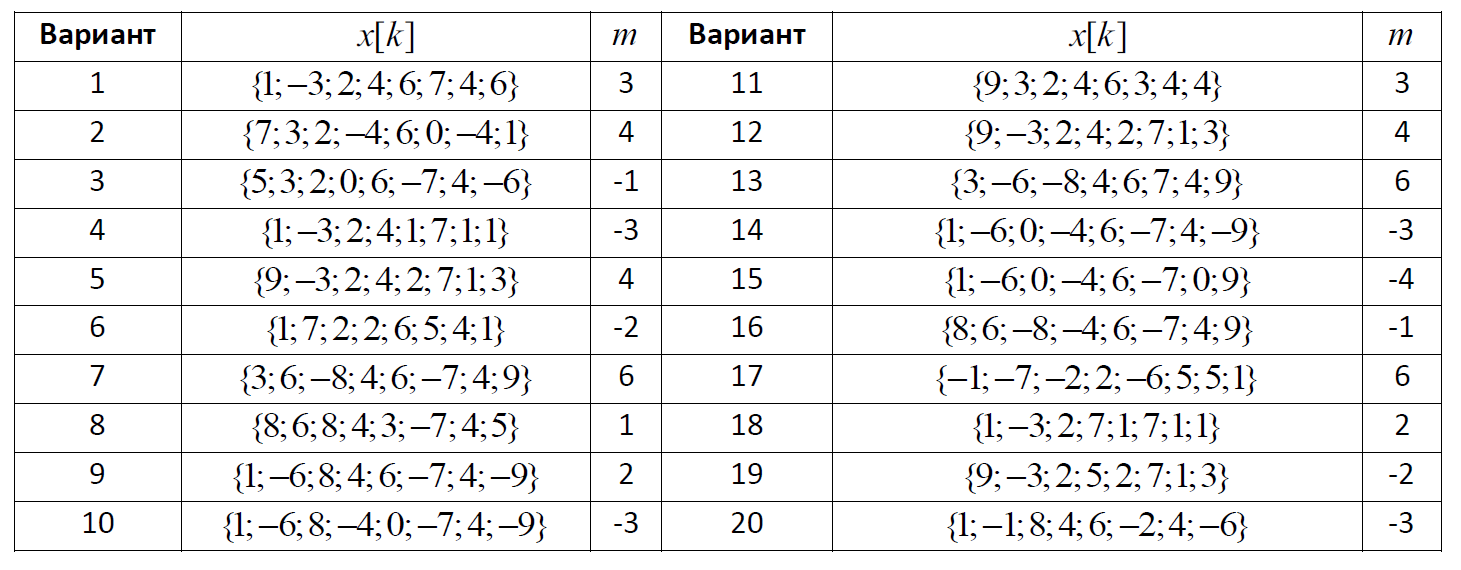

## Вариант 12

In [14]:
# x = np.array([9, -3, 2, 4, 2, 7, 1, 3])
N = 8
# x = np.ndarray(8)
# for k in range(0, N):
    # x[k] = 0.54 - 0.46 * np.cos(2*np.pi*1/N*k)

x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
m = 4

## Задача 2.1. Алгоритмы вычисления ДПФ. 

Вычислите ДПФ $X[n]$ для последовательности $x[k]$ (в соответствии с Вашим вариантом). Воспользуйтесь следующими способами:

а) вычисление с использованием матричной формы ДПФ;

- Воспользуемся матричной формой ДПФ. Функция `scipy.linalg.dft(N)` возвращает матрицу ДПФ $[W]_N$ размера $N\times N$. 

б) алгоритм быстрого преобразование Фурье (БПФ).

- Воспользуемся функцией `np.fft.fft()`.

Сравните результаты. 


Формула прямого ДПФ в данном случае без нормирующего множителя $1/N$:
$$X[n]=\sum_{k=0}^{N-1} x[k]\exp \left(-j2\pi \frac{nk}{N}\right)$$


In [15]:
N = len(x)
n = np.arange(N)

# Матричная форма ДПФ.
WN = sp.linalg.dft(N)
Xn = np.matmul(WN, x)

# Быстрое преобразование Фурье.
Xn_fft = np.fft.fft(x)

assert max(abs(Xn_fft-Xn)) < 1e-6

## Задача 2.2  Свойства симметрии ДПФ. 

Для последовательности $x[k]$ постройте графики $\text{Re}\ X[n]$, $\text{Im}\ X[n]$, $\left| X[n] \right|$, $\angle \ X[n]$.

Сравните получившиеся результаты со свойствами симметрии ДПФ.

- Для действительной последовательности $X[n] = X^{*}[N-n]$.


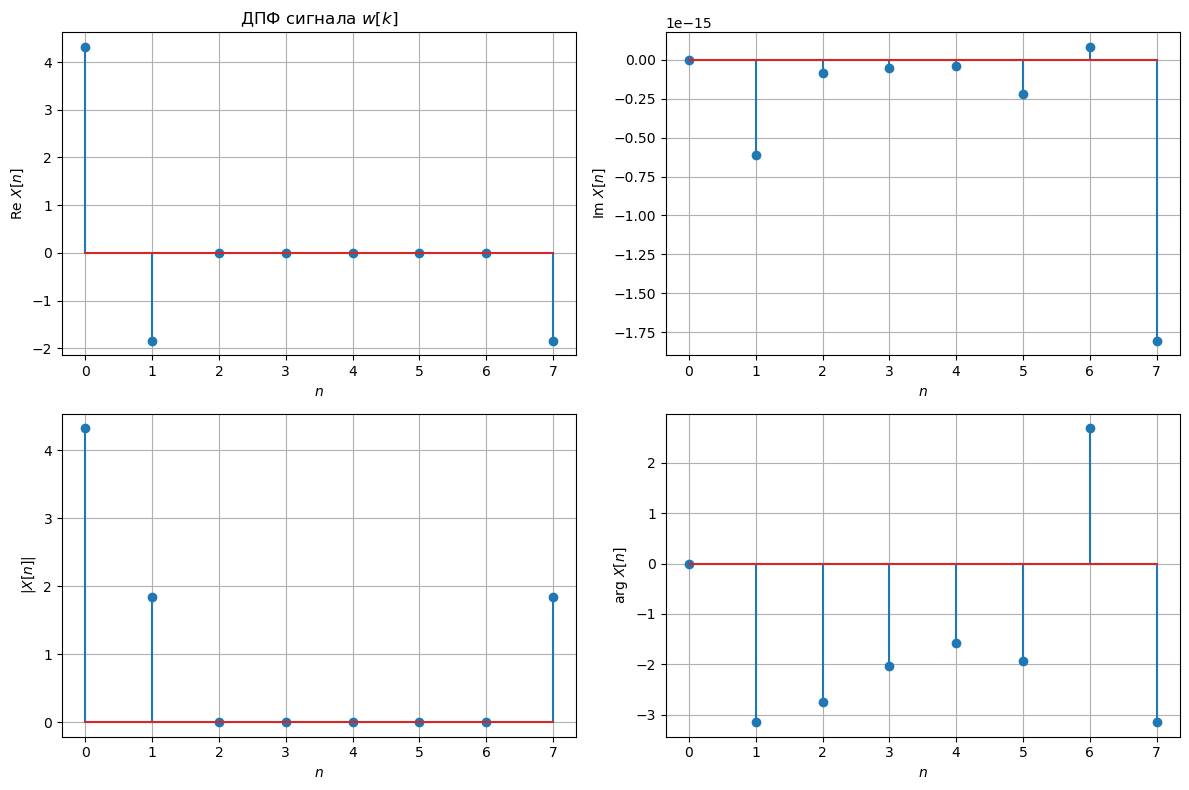

In [16]:
plt.figure(figsize=[12, 8])

plt.subplot(2, 2, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 2, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')
plt.grid()

plt.subplot(2, 2, 3)
plt.stem(n, abs(Xn))
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('$|X[n]|$')
plt.grid()

plt.subplot(2, 2, 4)
plt.stem(n, np.angle(Xn))
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('arg $X[n]$')
plt.grid()

plt.tight_layout()

## Задача 2.3.  Циклический сдвиг в ДПФ. 


Постройте график для последовательности $x[k]$.
Вычислите последовательность $y[k]$, ДПФ которой 
$Y[n]=\exp \left( -j\frac{2\pi }{8}mn \right)X[n].$

Сравните получившиеся последовательности. 


In [439]:
Yn = np.exp(-1j*2/8*np.pi*m*n) * Xn
y=np.fft.ifft(Yn)


m = 4


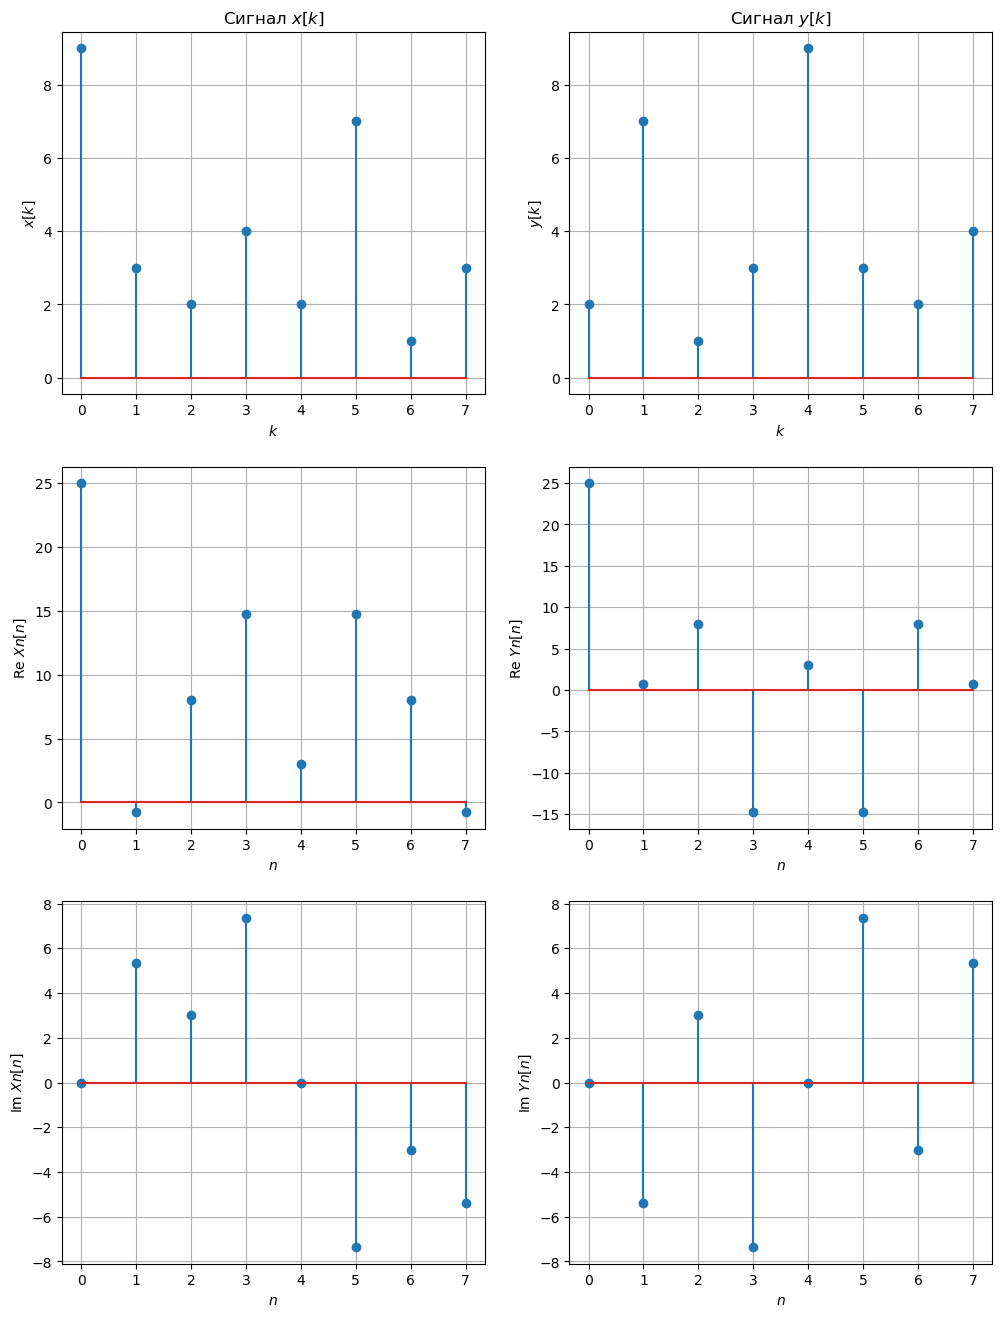

In [440]:
def drawDFT(Xn, n, title, ax1, ax2):
    ax1.stem(n, Xn.real)
    ax1.set_xticks(n)
    ax1.set_xlabel('$n$')
    ax1.set_ylabel(f'Re ${title}[n]$')
    ax1.grid()

    ax2.stem(n, Xn.imag)
    ax2.set_xticks(n)
    ax2.set_xlabel('$n$')
    ax2.set_ylabel(f'Im ${title}[n]$')
    ax2.grid()

def drawSeq(x, n, title, ax):
    ax.stem(n, abs(x))
    ax.set_title(f'Сигнал ${title}[k]$')
    ax.set_xlabel('$k$')
    ax.set_ylabel(f'${title}[k]$')
    ax.grid()

print(f'm = {m}')
fig, axes = plt.subplots(3, 2, figsize=[12, 16])
drawSeq(x, n, "x", axes[0][0])
drawSeq(y, n, "y", axes[0][1])
drawDFT(Xn, n, "Xn", axes[1][0], axes[2][0])
drawDFT(Yn, n, "Yn", axes[1][1], axes[2][1])

# Занятие 3. Связь ДВПФ и ДПФ

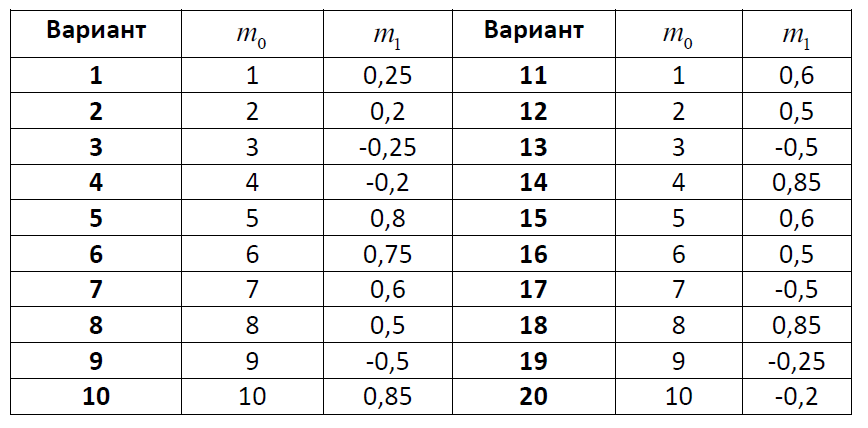

In [441]:
m0 = 2
m1 = 0.5

## Задача 3.1. Интерполяция  ДВПФ добавлением нулевых отсчетов в сигнал.

Постройте на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$ последовательности ($N=32$)
$$ x[k]=\left \{
\begin{array}{l}
   \sin \left( \frac{2\pi }{N}{{m}_{0}}k \right)+\sin \left( \frac{2\pi }{N} \left( {{m}_{0}}+0.25 \right)k \right), 0 \le k \le N-1; \\
   0, \text{при других }k.
\end{array} \right \}$$
Увеличьте размерность ДПФ, добавив нулевые отсчеты так, чтобы все относительные частоты синусоид попадали на бины ДПФ.  Приведите на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$  для этого случая. Сравните результаты. 

In [442]:
N = 32
n = np.arange(N)
x = np.sin(2*np.pi*m0*n/N) + np.sin(2*np.pi/N*(m0+0.25)*n)

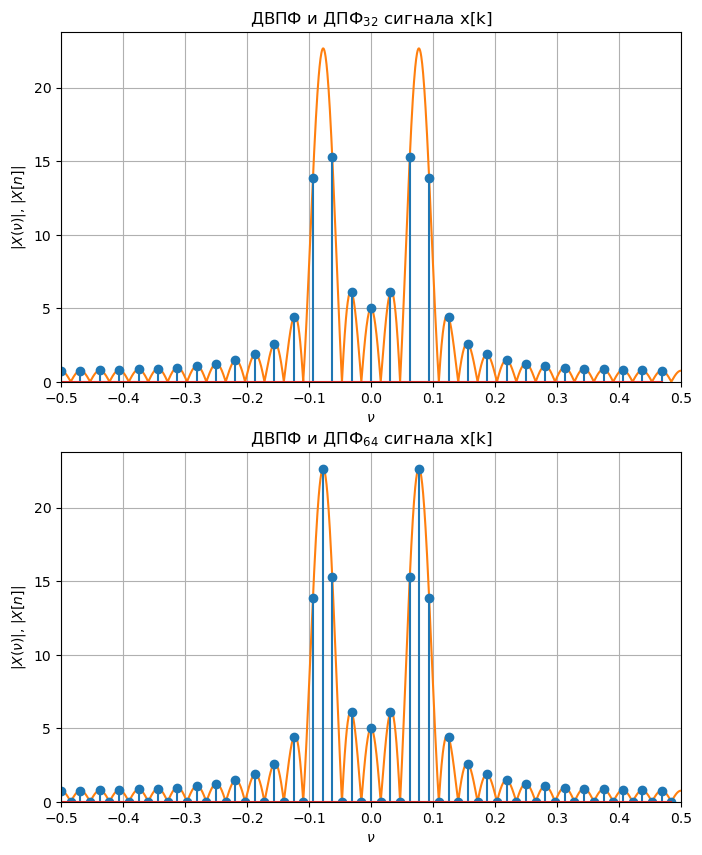

In [448]:
def dft(x, M):
    return np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M)))

def drawCompareFT(nu_dtft, X_dtft, nu_dft, X_dft, ax, M):
    ax.plot(nu_dtft, abs(X_dtft), 'C1')
    ax.stem(nu_dft, X_dft, linefmt='C0', markerfmt='C0o')

    ax.set_xlim([-0.5, 0.5])
    ax.set_ylim(bottom=0)
    ax.set_title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
    ax.set_xlabel('$\\nu$')
    ax.set_ylabel('$|X(\\nu)|$, $|X[n]|$')
    ax.set_xticks(np.linspace(-0.5, 0.5, 11))
    ax.grid()

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# ДВПФ.
nu, X = dtft(x, M=2048)

# ДПФ.
M = N
nu_dft, X_dft = dft(x, M)
drawCompareFT(nu, X, nu_dft, X_dft, axes[0], M)

# Добавим нули в ДПФ.
M = N + 32
nu_dft, X_dft = dft(x, M)
drawCompareFT(nu, X, nu_dft, X_dft, axes[1], M)


## Задача 3.2. ДВПФ и ДПФ периодической последовательсти.

Простройте графики для действительной  и мнимой части коэффициентов ДПФ $\tilde{X}[n]$ периодической последовательности $x[k]=\cos \left( \frac{2\pi }{N}mk \right)+\sin \left( \frac{2\pi }{N}mk \right)$  с периодом $N=32$, для случаев $m={{m}_{0}}$ и $m={{m}_{0}}+{{m}_{1}}$. Получите аналитическую запись ДПФ. Сравните ДПФ последовательности с ее ДВПФ. Определите, выполняется ли связь между весами дельта-функций в ДВПФ и величинами отсчетов ДПФ. 

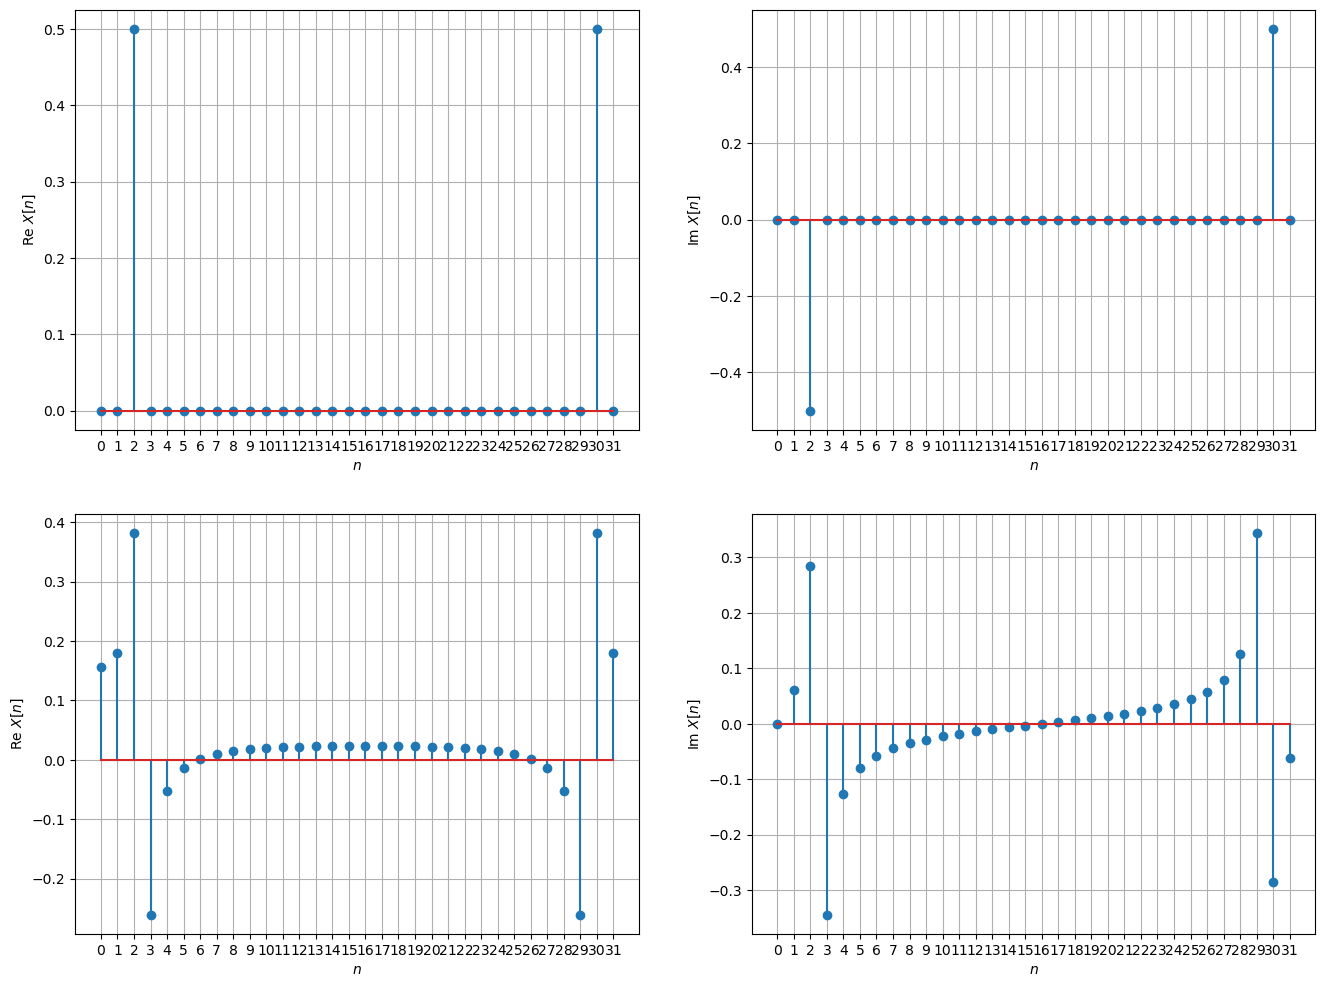

In [456]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

N = 32
M = 32
n = np.arange(M)

m = m0
x = np.cos(2*np.pi/N*m*n) + np.sin(2*np.pi/N*m*n)
X_dft = 1/M * np.fft.fft(x)
drawDFT(X_dft, n, 'X', axes[0][0], axes[0][1])

m = m0 + m1
x = np.cos(2*np.pi/N*m*n) + np.sin(2*np.pi/N*m*n)
X_dft = 1/M * np.fft.fft(x)
drawDFT(X_dft, n, 'X', axes[1][0], axes[1][1])


# Примеры вычислений на Python для лабораторной работы №2 "ДВПФ и ДПФ"

## Задание последовательности отсчетов

Зададим последовательность из 10 единичных импульсов $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

In [3]:
w = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
w

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Сделаем тоже самое с помощью функции `ones`

In [4]:
w1=np.ones(10)
w1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Выведем график последовательности $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

<IPython.core.display.Javascript object>


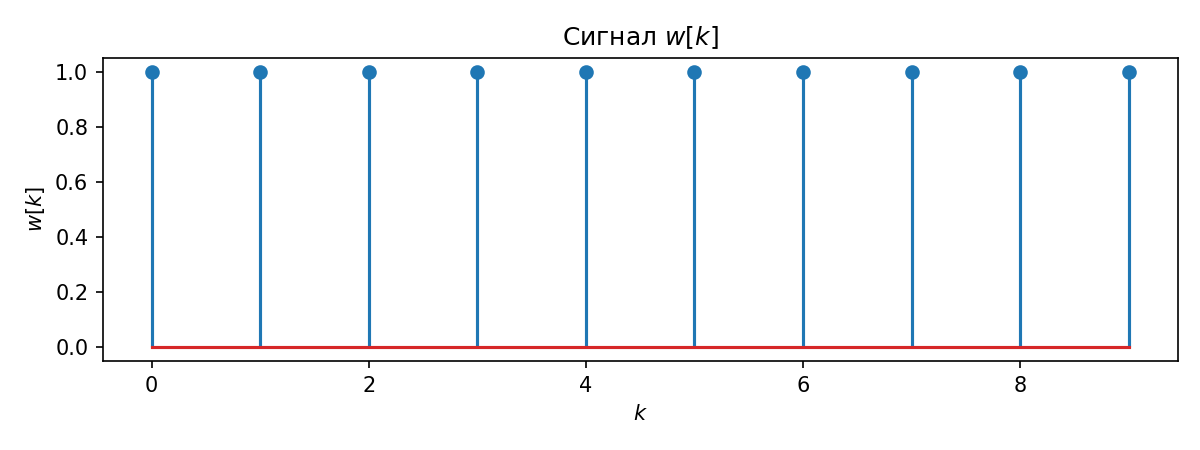

In [6]:
N=len(w)
k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, w)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

Определим последовательность вида $y[k]=\exp(j2\pi \nu_0 k) w[k]$

In [7]:
k = np.arange(N)
nu_0 = 0.25
y=np.exp(1j*2*np.pi*nu_0*k)
y

array([ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
       -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j,
        1.0000000e+00-2.4492936e-16j,  3.0616170e-16+1.0000000e+00j,
       -1.0000000e+00+3.6739404e-16j, -4.2862638e-16-1.0000000e+00j,
        1.0000000e+00-4.8985872e-16j,  5.5109106e-16+1.0000000e+00j])

Определим дискретную линейную свертку (Convolution) последовательности $w[k]$ c точно такой же последовательностью.

In [8]:
w2=signal.convolve(w, w)
w2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1])

Выведем график для такой последовательности:

<IPython.core.display.Javascript object>


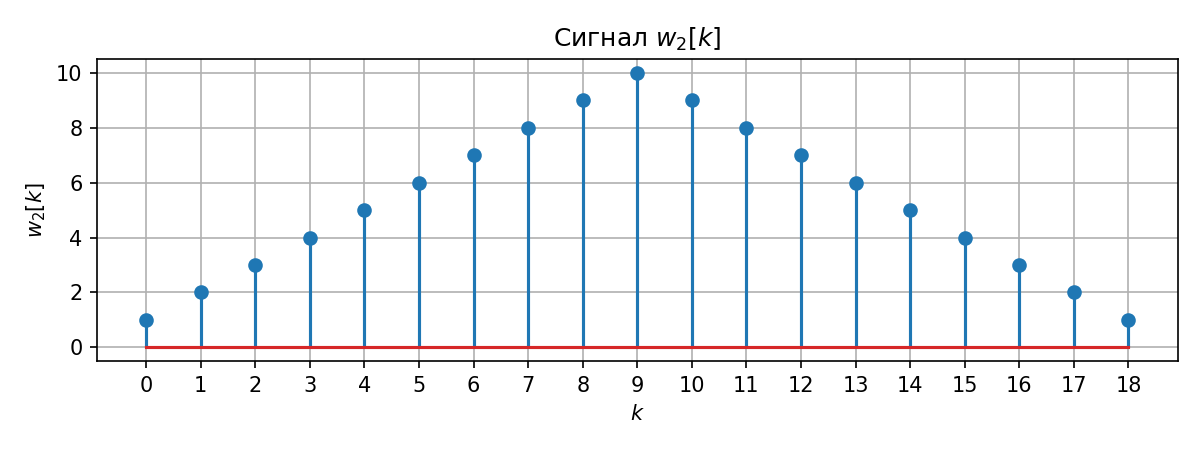

In [10]:
N=len(w2)
k = np.arange(0, N)
plt.figure(figsize=[8, 3])
plt.stem(k, w2)
plt.title('Сигнал $w_2[k]$')
plt.xlabel('$k$')
plt.ylabel('$w_2[k]$')
plt.grid()
plt.xticks(k) # установить деления шкалы абсцисс для каждого отсчета
plt.tight_layout()

Поэлементное умножение задается оператором `*`

In [11]:
w2*w2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100,  81,  64,  49,
        36,  25,  16,   9,   4,   1])

## Вычисление ДВПФ

Определим ДВПФ последовательности $w[k]=\sum_{m=0}^{N-1} \mathbf{1}[k-m]$ 

In [12]:
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

In [13]:
nu, W = dtft(w, M=2048)

* `nu` — массив частот $\nu \in [-0.5;0.5)$ с шагом сетки $\Delta \nu =1/M$,
* `W` — значения ДВПФ $W(\nu )$ в этих точках, 
* `dtft` — функция, 
* `w` — последовательность отсчетов, 
* `M` — число точек на сетки оси частот, в которых вычисляется ДВПФ. 

Построим график для модуля ДВПФ

<IPython.core.display.Javascript object>


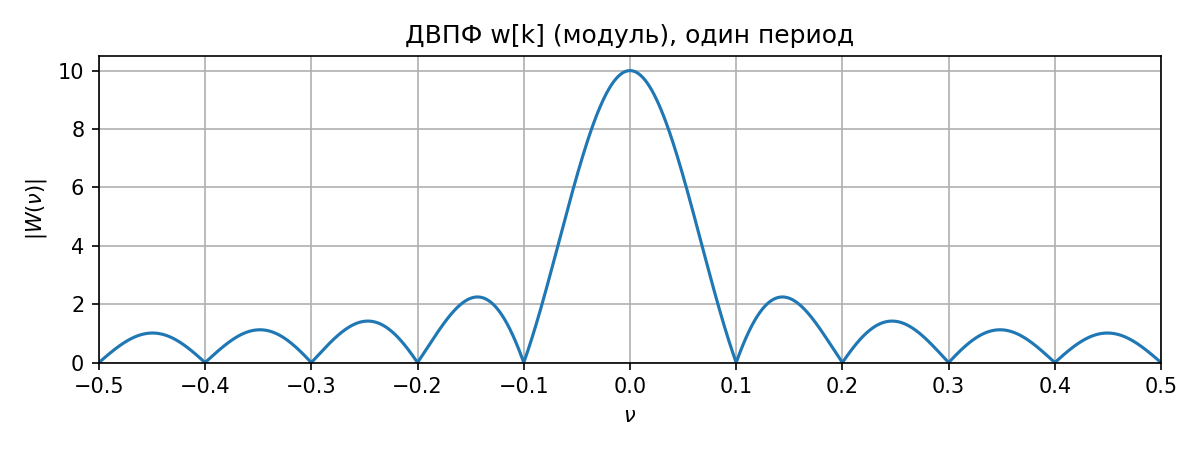

In [16]:
plt.figure(figsize=[8, 3])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Теперь выведем фазовую часть ДВПФ

<IPython.core.display.Javascript object>


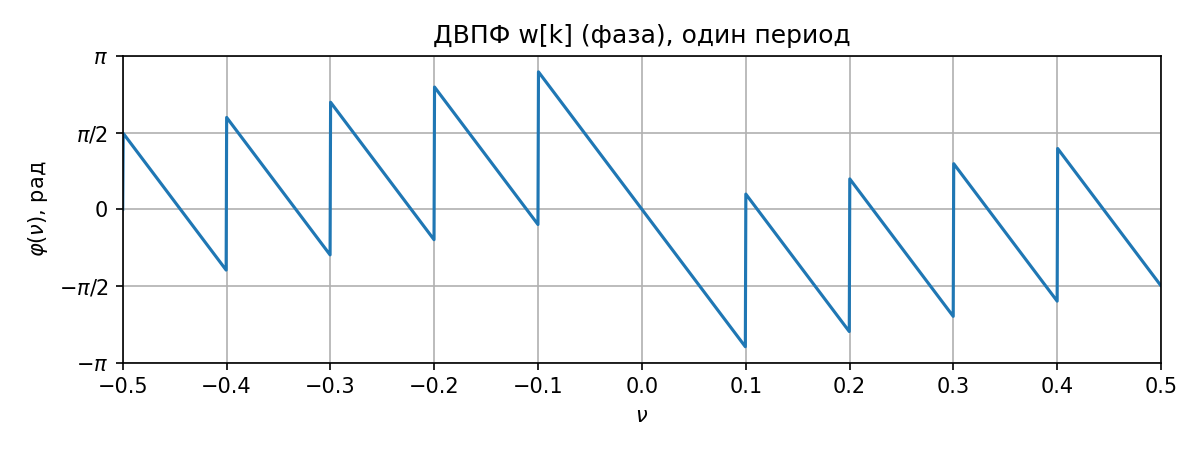

In [17]:
plt.figure(figsize=[8, 3])
plt.plot(nu, np.angle(W))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (фаза), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Вычисление ДПФ

Вычислим ДПФ $N$-точечной последовательности

$$x[k]=\sin \left(2\pi \frac{2}{N}k\right)+\cos \left(2\pi \frac{3}{N}k\right),\;\;k=0,1,\dots ,N-1,\;\;N=8.$$

Формула прямого ДПФ в данном случае без нормирующего множителя $1/N$:
$$X[n]=\sum_{k=0}^{N-1} x[k]\exp \left(-j2\pi \frac{nk}{N}\right)$$
Сначала воспользуемся матричной формой ДПФ. Функция `scipy.linalg.dft(N)` возвращает матрицу ДПФ $[W]_N$ размера $N\times N$. 


In [18]:
N=8
k=np.arange(N)
x=np.sin(2*np.pi*2/N*k)+np.cos(2*np.pi*3/N*k)
W8 = dft(N)
Xn = W8 @ x
Xn

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        1.13832009e-16-4.00000000e+00j,  4.00000000e+00+2.22044605e-16j,
        1.33226763e-15+7.88860905e-31j,  4.00000000e+00+4.66293670e-15j,
       -5.01463715e-15+4.00000000e+00j,  0.00000000e+00-2.66453526e-15j])

Построим графики. 

<IPython.core.display.Javascript object>


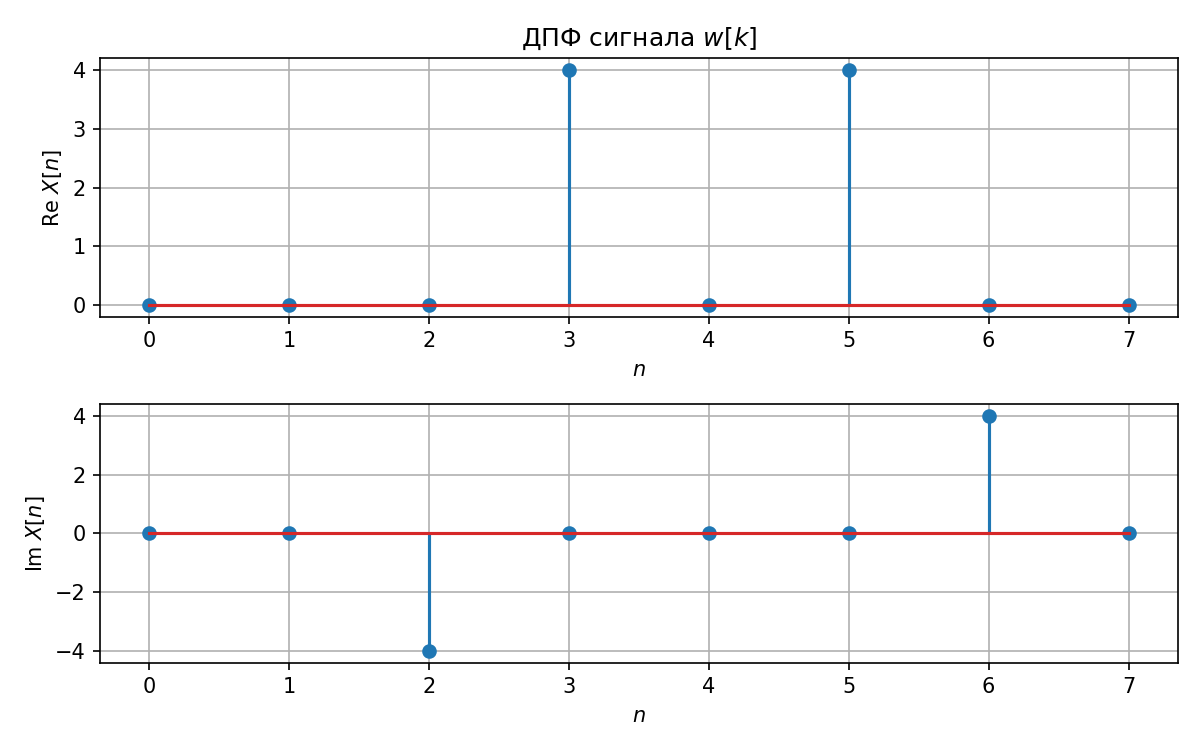

In [20]:
plt.figure(figsize=[8, 5])

n=np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()
plt.tight_layout()

Теперь проведем вычисление ДПФ по алгоритму быстрого преобразования Фурье (БПФ). Для этого воспользуемся функцией `np.fft.fft()`.


In [291]:
Xn1=np.fft.fft(x)
Xn1

array([25.        +0.j        , -0.77817459+5.36396103j,
        8.        +3.j        , 14.77817459+7.36396103j,
        3.        +0.j        , 14.77817459-7.36396103j,
        8.        -3.j        , -0.77817459-5.36396103j])

Сравним результаты.

In [22]:
max(abs(Xn1-Xn))

4.034322756779725e-15

## Вычисление обратного ДПФ


Матрица обратного ДПФ может быть найдена как обратная матрица для $[W]_N$.

In [23]:
W8_inv1 = np.linalg.inv(W8)

Также ее можно получить с помощью транспонирования и комплексного сопряжения (эрмитова сопряжения) c дополнительной нормировкой на $N$, в силу того, что $[W]_N^{-1} =\frac{1}{N}{\left([W]_N^T \right)}^* =\frac{1}{N}[W]_N^*$. 


In [24]:
W8_inv2 = np.conjugate(W8) / N

Вычислим обратное ДПФ, используя матричную форму. Сравним результат с исходной последовательностью. 


In [25]:
x1 = W8_inv1 @ Xn
max(abs(x1-x))

7.901860134932568e-16

Выполним те же вычисления с использованием алгоритма БПФ. Для этого нам понадобится функция `np.fft.ifft()`

In [26]:
x2=np.fft.ifft(Xn)
max(abs(x2-x))

1.4861185472553567e-15

## Интерполяция ДВПФ добавлением нулевых отсчетов

Построим на одном графике модули ДПФ и ДВПФ $N$-точечной последовательности ($N=16$)

$$x[k]=\sin \left(2\pi \frac{5.5}{16} k \right),\;\;k=0,1,\dots ,N-1.$$

In [27]:
N=16
k=np.arange(N)
n=np.arange(N)
x=np.sin(2*np.pi*5.5*k/N)

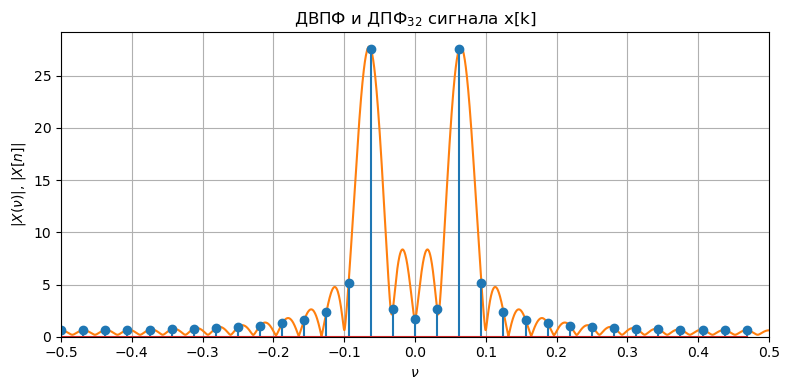

In [362]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

M=N
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Здесь функция `np.fft.fftshift` позволяет циклически сдвинуть вычисленные отсчеты ДПФ так, чтобы они соответствовали частотам$\nu_n \in [-0.5;0.5)$, $\nu_n =-0.5+\frac{n}{N}.$

Относительная частота синусойды $\nu_0 =\frac{6.5}{16}$ не попадет на сетку частот ДПФ. В результате спектральные максимумы недостаточно хорошо визуализируются отсчетами ДПФ. Чтобы это улучшить, добавим к последовательности, используемой при вычислении ДПФ, нулевые отсчеты в конец сигнала. Для этого досточно указать второй параметр функции `np.fft.fft(x, M)` равный новому числу отсчетов. 


<IPython.core.display.Javascript object>


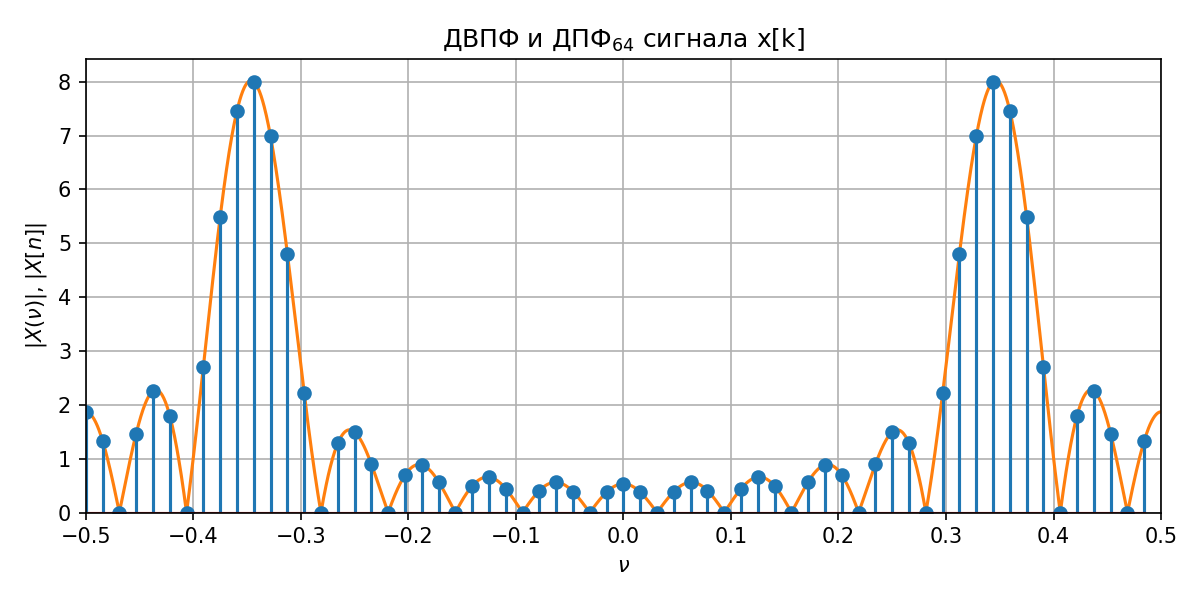

In [29]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

Nz=48
M=N+Nz
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()